In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
from matplotlib import cm
from tqdm import tqdm
import json
import anndata as ad

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
from scipy.spatial import KDTree
import networkx as nx


from src.slide_utilities import *

import warnings
warnings.filterwarnings('ignore')

In [5]:
threshol_set = {
    'X2'  : {'threshold' : [75, 800], 'remove_no' : []},
    'X4'  : {'threshold' : [20, 800], 'remove_no' : [6]},
    'X12'  : {'threshold' : [80, 800], 'remove_no' : []},
    'X13'  : {'threshold' : [80, 800], 'remove_no' : [10, 27, 26, 22, 24, 17, 18, 20, 15]},
    'X14'  : {'threshold' : [12, 800], 'remove_no' : [12]},
    'X15'  : {'threshold' : [120, 800], 'remove_no' : []},
    'X16'  : {'threshold' : [120, 800], 'remove_no' : []},
    'X17'  : {'threshold' : [50, 800], 'remove_no' : [41, 49, 31]},
    'X21'  : {'threshold' : [100, 8000], 'remove_no' : [5,28,24,62,65,76,119,133,135,139,173,176,177,93,101,116,115,106,171,168,169,87,22,170,48,54,95,11,18,17,178,137,142,11,130,97,11,84,78,83,131,26,30,61,82,114,11,18,17]},
    'X23'  : {'threshold' : [20, 800], 'remove_no' : [0, 4, 5]},
    'X24'  : {'threshold' : [100, 800], 'remove_no' : []},
    'X25'  : {'threshold' : [0, 800], 'remove_no' : [0, 3, 6, 7, 8, 10]},
    'X27'  : {'threshold' : [100, 800], 'remove_no' : []},
    'X29'  : {'threshold' : [100, 800], 'remove_no' : []},
    'X30'  : {'threshold' : [100, 800], 'remove_no' : []},
    'X33'  : {'threshold' : [100, 800], 'remove_no' : []},
    'X35'  : {'threshold' : [80, 800], 'remove_no' : [9]},
    'X36'  : {'threshold' : [80, 800], 'remove_no' : [12, 7, 25, 24]},
    'X37'  : {'threshold' : [20, 800], 'remove_no' : [9,10,11,19,7]},
    'X38'  : {'threshold' : [20, 800], 'remove_no' : [5, 13]},
    'X39'  : {'threshold' : [80, 800], 'remove_no' : []},
    'X40'  : {'threshold' : [20, 800], 'remove_no' : [2]},
    'X43'  : {'threshold' : [20, 800], 'remove_no' : [0,2,12]},
    'X45'  : {'threshold' : [20, 800], 'remove_no' : [0,5]},
    'X46'  : {'threshold' : [150, 800], 'remove_no' : [3, 5]},
    'X47'  : {'threshold' : [50, 800], 'remove_no' : []},
    'X48'  : {'threshold' : [100, 800], 'remove_no' : []},
    'X49'  : {'threshold' : [100, 800], 'remove_no' : []},
    'X50'  : {'threshold' : [50, 800], 'remove_no' : []},
    'X51'  : {'threshold' : [20, 800], 'remove_no' : [1, 12]},
    'X52'  : {'threshold' : [20, 800], 'remove_no' : [5},
    'X53'  : {'threshold' : [50, 900], 'remove_no' : [21,27,26,33,35,36,16,55,61,63,64,65,62]},
    'X53'  : {'threshold' : [50, 900], 'remove_no' : []},
    'X54'  : {'threshold' : [20, 900], 'remove_no' : [9]},
    'X56'  : {'threshold' : [100, 900], 'remove_no' : [0]},
    'X58'  : {'threshold' : [100, 900], 'remove_no' : []},
    'X60'  : {'threshold' : [50, 900], 'remove_no' : [0, 2, 3, 13, 16]},
    'X62'  : {'threshold' : [200, 900], 'remove_no' : []},
    'X63'  : {'threshold' : [200, 900], 'remove_no' : []},
}

In [90]:
adata = sc.read_h5ad("data/adata_nichepca_per_sample_with_domain_2_slide2.h5ad")
adata = ad.AnnData(
    X=adata.X, 
    obs=adata.obs,
    # uns={'spatial': adata.uns['spatial']},
    obsm={'spatial': adata.obsm['spatial']}
)
adata

AnnData object with n_obs × n_vars = 289602 × 480
    obs: 'x', 'y', 'z', 'cluster', 'n_transcripts', 'density', 'elongation', 'area', 'avg_confidence', 'avg_assignment_confidence', 'max_cluster_frac', 'lifespan', 'x_centroid', 'y_centroid', 'cell_area', 'n_genes', 'celltype_l1', 'celltype_l1_codes', 'celltype_l1_prob', 'Slide_ID', 'sample', 'label', 'cell_name', 'Ki67', 'batch', 'per_sample_leiden_res_0.03', 'per_sample_leiden_res_0.05', 'per_sample_leiden_res_0.07', 'per_sample_leiden_res_0.09', 'per_sample_leiden_res_0.11', 'per_sample_leiden_res_0.13', 'per_sample_leiden_res_0.15', 'per_sample_leiden_res_0.17', 'per_sample_leiden_res_0.19', 'per_sample_leiden_res_0.21', 'per_sample_leiden_res_0.23', 'per_sample_leiden_res_0.25', 'per_sample_leiden_res_0.27', 'per_sample_leiden_res_0.29', 'per_sample_leiden_res_0.31', 'per_sample_leiden_res_0.33', 'per_sample_leiden_res_0.35', 'per_sample_leiden_res_0.37', 'per_sample_leiden_res_0.39', 'domains'
    obsm: 'spatial'

In [4]:
sample_set = adata.obs['sample'].unique()
list(sample_set)

['X1_slide2',
 'X2_slide2',
 'X3_slide2',
 'X4_slide2',
 'X5_slide2',
 'X6_slide2',
 'X7_slide2']

In [5]:
## Get glom locations
# i = 0
# sample = sample_set[i]
sample = 'X5_slide2'

adata_i = adata[adata.obs['sample'] == sample]
df_glom_i = adata_i.obs.loc[adata_i.obs['domains'] == 'Glom.', ['x', 'y']]

df_glom_i.head()

,x,y
cell_CR9fbacb852-63247-1-0-0,7199.377986,6079.889520
cell_CR9fbacb852-63522-1-0-0,7233.651730,6112.872852
cell_CR9fbacb852-63605-1-0-0,7234.038161,6118.498417
cell_CR9fbacb852-63611-1-0-0,7233.725306,6126.274053
cell_CR9fbacb852-63616-1-0-0,7274.424854,6083.291413


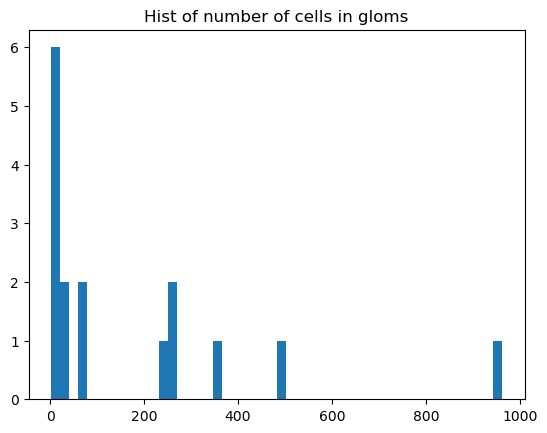

Text(0.5, 1.0, 'Isolated samples')

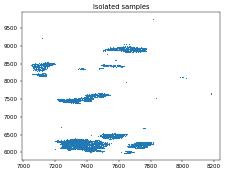

In [6]:
# Cluster gloms
## Make a distnace matrix via KDTree
coords = np.array(df_glom_i)
kdtree = KDTree(coords)
dist_mat = kdtree.sparse_distance_matrix(kdtree, max_distance=50)

## Convert into a "networkx" object
edge_index = np.array(dist_mat.nonzero())
G = nx.Graph()
G.add_edges_from(edge_index.T)

## Get connected components
cc = list(nx.connected_components(G))

## Plot hist for number of cells in gloms
sizes = np.array([len(c) for c in cc])
plt.hist(sizes, 50);
plt.title("Hist of number of cells in gloms")
plt.show()

# plot
dpi = 40
plt.figure(dpi=dpi)
plt.scatter(coords[:, 0], coords[:, 1], s=1, cmap="jet")
plt.title("Isolated samples")

In [34]:
# Set threshold
threshold = [600, 8000]
remove_no = []

# threshold = [0, 8000]
# remove_no = []

cc_filtered = [c for i, c in enumerate(cc) if (len(c) > threshold[0]) and (len(c) < threshold[1]) and (i not in remove_no)]

if len(cc_filtered) == 0:
    print('No glom remained')
else:
    print(f'Number of glomes remained = {len(cc_filtered)}')
    ## set glom numbers
    filtered_nodes = np.hstack([list(c) for c in cc_filtered])
    glom_number = []
    for i in filtered_nodes:
        for n, c in enumerate(cc_filtered):
            i_in_c = list(c).count(i) > 0
            if i_in_c:
                glom_number.append(n)
                break

Number of glomes remained = 1


In [35]:
# Make glom_adata "adata_glom" for sample i
X_glom = adata_i.X[adata_i.obs['domains'] == 'Glom.', :].copy()
adata_glom = sc.AnnData(X_glom)
adata_glom.var = adata_i.var
adata_glom.obs = adata_i.obs.loc[adata_i.obs['domains'] == 'Glom.', 
                              ['x', 'y', 'n_transcripts', 'domains']]
# adata_glom.obs['sample'] = sample.split("_")[0]
# adata_glom.obs['label'] = sample.split("_")[1]
adata_glom = adata_glom[filtered_nodes,:]
adata_glom.obs['domain_tuned'] = 'Glom.'
adata_glom.obs['glom_no'] = glom_number

In [36]:
# Add to the adata
## restrict adata to adata_i
adata_i = adata[adata.obs['sample'] == sample].copy()
df_i = adata_glom.obs.copy()

## Merge df_gnn_i to adata_i.obs
merged_df = adata_i.obs.merge(df_i[['domain_tuned', 'glom_no']], 
                              left_index=True, 
                              right_index=True,
                              how='left', 
                              suffixes=('', '_nichepca'))
adata_i.obs.shape, merged_df.shape

((32292, 45), (32292, 47))

In [37]:
adata_i.obs = merged_df
adata_i.obs.head()

,x,y,z,cluster,n_transcripts,density,elongation,area,avg_confidence,avg_assignment_confidence,...,per_sample_leiden_res_0.27,per_sample_leiden_res_0.29,per_sample_leiden_res_0.31,per_sample_leiden_res_0.33,per_sample_leiden_res_0.35,per_sample_leiden_res_0.37,per_sample_leiden_res_0.39,domains,domain_tuned,glom_no
cell_CR9fbacb852-62506-1-0-0,7018.817391,6066.334165,32.876935,4,79,0.9984,2.156,79.13,0.9978,0.8856,...,0,0,0,1,1,0,0,Other,NaN,NaN
cell_CR9fbacb852-62507-1-0-0,6987.597269,6100.887147,33.661773,1,70,0.9167,2.650,76.36,0.9978,0.8574,...,0,0,0,0,0,1,1,Other,NaN,NaN
cell_CR9fbacb852-62509-1-0-0,7000.781186,6091.276612,33.283890,1,161,1.8790,2.159,85.70,0.9980,0.8671,...,0,0,0,0,0,1,1,Other,NaN,NaN
cell_CR9fbacb852-62510-1-0-0,7030.503469,6055.230971,32.820324,4,89,1.5800,3.622,56.33,0.9982,0.8288,...,2,1,1,1,1,0,0,Other,NaN,NaN
cell_CR9fbacb852-62512-1-0-0,6976.912786,6109.899559,34.413665,4,83,1.1090,2.279,74.82,0.9976,0.8472,...,0,2,2,0,3,1,1,Other,NaN,NaN


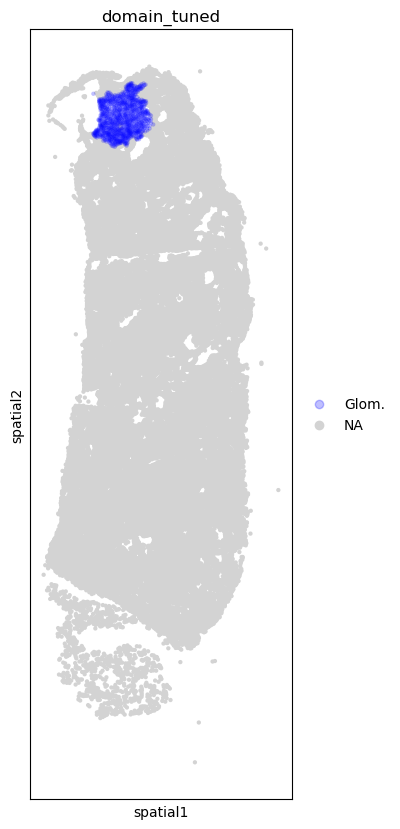

In [38]:
# Plot
plot_HE = False
show = True
slide = adata_i.obs['Slide_ID'][0]

## add color
colormap = {'Glom.': '#0000FF40'}
adata_i.obs['domain_tuned'] = pd.Categorical(adata_i.obs['domain_tuned'], 
                                       categories=list(colormap.keys()), 
                                       ordered=True)
adata_i.uns['domain_tuned_colors'] = list(colormap.values())

adata_i.obs['is_pod'] = adata_i.obs['celltype_l1'] == 'podocyte'

fig, ax = plt.subplots(figsize=(10, 10))
sc.pl.spatial(adata_i,
              # library_id=slide,
              img_key='he_downscaled_aligned' if plot_HE else None,
              color='domain_tuned',
              # color = 'is_pod',
              size=0.5,
              ax=ax,
              spot_size = 50,
              show=show
             )

if show:
    plt.show()
else:
    plt.savefig(f"figure_gloms/sample_{sample.split('_')[0]}.pdf", bbox_inches='tight')
plt.close(fig)

In [39]:
# adata_i[adata_i.obs["celltype_l1"]=="PEC"].obs["celltype_l1_prob"].plot(kind="box")

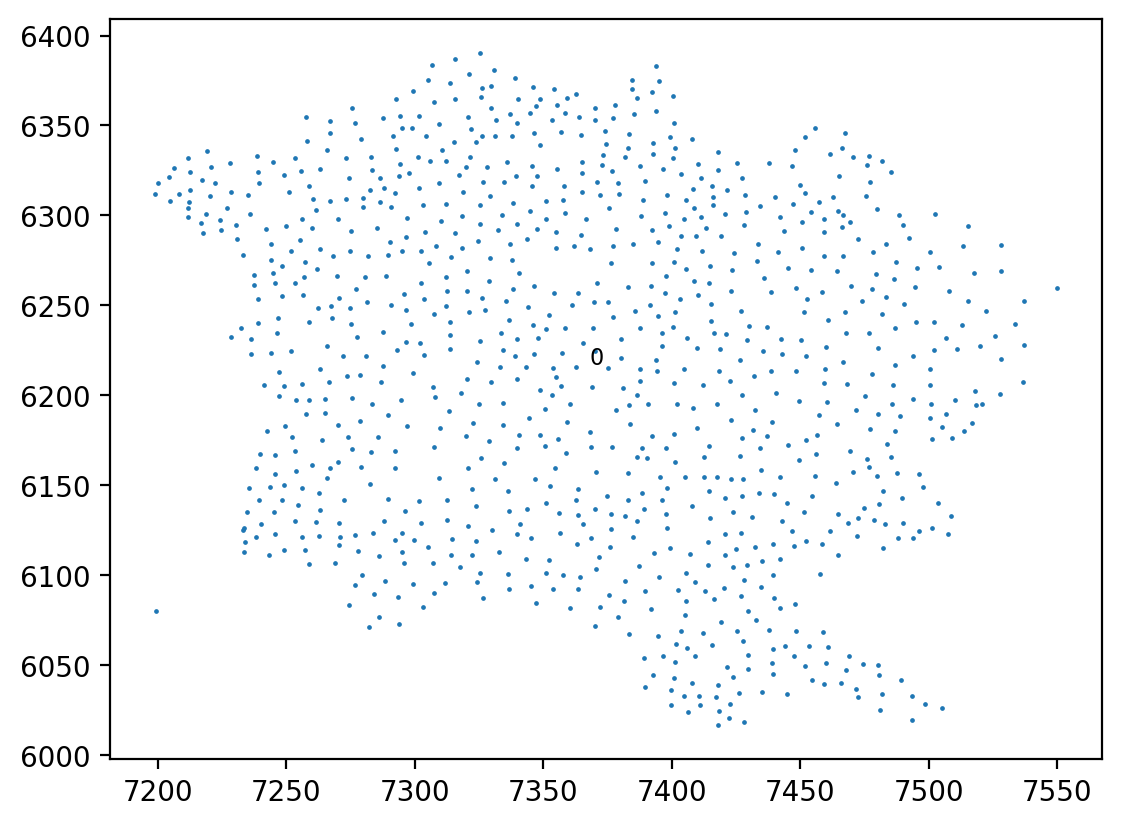

In [40]:
dpi = 200
plt.figure(dpi=dpi)
glom_mask = adata_i.obs['domain_tuned'] == 'Glom.'
plt.scatter(adata_i.obs.loc[glom_mask, 'x'], adata_i.obs.loc[glom_mask, 'y'], s=.5)

for i in range(len(cc_filtered)):
    centroid = adata_i.obs.loc[adata_i.obs['glom_no'] == i, ['x', 'y']].mean()
    plt.text(centroid[0], centroid[1], f"{i}", fontsize=8)

In [41]:
print(ax.get_xlim())
print(ax.get_ylim())
sample

(268.0101579807682, 1806.223540096153)
(4639.140913, 133.52082699999937)


'X5_slide2'

In [42]:
adata_i.obs.to_csv(f"obs/data_tuned_glom_{sample}.csv")
f"obs/data_tuned_glom_{sample}.csv"

'obs/data_tuned_glom_X5_slide2.csv'

In [43]:
# Plot
plot_HE = False
show = False
slide = adata_i.obs['Slide_ID'][0]

## add color
colormap = {'Glom.': '#0000FF40'}
adata_i.obs['domain_tuned'] = pd.Categorical(adata_i.obs['domain_tuned'], 
                                       categories=list(colormap.keys()), 
                                       ordered=True)
adata_i.uns['domain_tuned_colors'] = list(colormap.values())

fig, ax = plt.subplots(figsize=(10, 10))
sc.pl.spatial(adata_i,
              # library_id=slide,
              img_key='he_downscaled_aligned' if plot_HE else None,
              color='domain_tuned',
              size=0.5,
              ax=ax,
              spot_size = 50,
              show=show
             )

if show:
    plt.show()
else:
    plt.savefig(f"figure_gloms/sample_{sample}.pdf", bbox_inches='tight')
plt.close(fig)

# Merge all adata_i into adata

In [92]:
# Merge all adata_i into adata

## Read data: registered with harmony embedding
data_path = "../03_image_registration/data_level_1/adata_slide2_with_Ki67_noX8_v1.h5ad"
adata = sc.read_h5ad(data_path)

sample_set = ['X1_slide2',
              'X2_slide2',
              'X3_slide2',
              'X4_slide2',
              'X5_slide2',
              'X6_slide2',
              'X7_slide2']

In [93]:
# Add empty cols to adata
adata.obs['sample'] = [i.upper() + '_slide2' for i in adata.obs['sample']]
adata.obs['label'] = 'na'
adata.obs['nichepca_domain'] = 'na'
adata.obs['nichepca_domain_tuned'] = float('nan')
adata.obs['nichepca_glom_no'] = float('nan')

In [94]:
# adata.obs.index = ['-'.join([i.split('-')[0], i.split('-')[1]]) for i in adata.obs.index]
# adata.obs.index

In [95]:
for sample in tqdm(sample_set):

    obs_path = f"obs/data_tuned_glom_{sample}.csv"
    if os.path.exists(obs_path):
        # read NichePCA annotation result
        adata_i_obs = pd.read_csv(obs_path, index_col=0)
    
        adata.obs.loc[adata_i_obs.index, 'nichepca_domain'] = adata_i_obs['domains']
        adata.obs.loc[adata_i_obs.index, 'nichepca_domain_tuned'] = adata_i_obs['domain_tuned']
        adata.obs.loc[adata_i_obs.index, 'nichepca_glom_no'] = adata_i_obs['glom_no']
    else:
        print("pass")
        pass

100%|██████████| 7/7 [00:03<00:00,  1.79it/s]


In [96]:
(adata.obs['nichepca_domain_tuned'] == 'Glom.').sum()

12685

In [124]:
(adata_i.obs['nichepca_domain_tuned'] == 'Glom.').sum()

1027

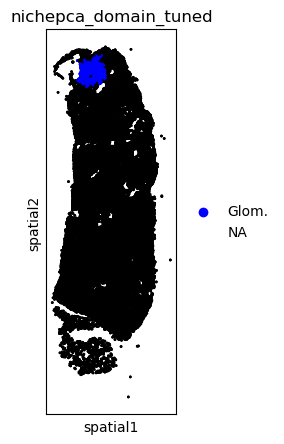

In [131]:
# # Final check plot
plot_HE = False

sample = 5
adata_i = adata[adata.obs['sample'] == f'X{sample}_slide2'].copy()
slide = adata_i.obs['Slide_ID'][0]


## add color
colormap = {'Glom.': '#0000FF40'}#, 'Other': '#1100040'}
adata_i.obs['nichepca_domain_tuned'] = pd.Categorical(adata_i.obs['nichepca_domain_tuned'], 
                                       categories=list(colormap.keys()), 
                                       ordered=True)
adata_i.uns['nichepca_domain_tuned_colors'] = list(colormap.values())

# fig, ax = plt.subplots(figsize=(5, 5))
# sc.pl.spatial(adata_i,
#               library_id=slide,
#               img_key='he_downscaled_aligned' if plot_HE else None,
#               color='nichepca_domain_tuned',
#               size=0.5,
#               ax=ax)


# spatial plot
fig, ax = plt.subplots(figsize=(5, 5))
sq.pl.spatial_scatter(
    adata_i,
    library_id="spatial",
    shape=None,
    color='nichepca_domain_tuned',
    wspace=0.1,
    ax = ax
)

In [16]:
# adata.write("adata/adata_nichepca_all_with_domain_tuned_v0.h5ad")

In [125]:
adata.obs['nichepca_domain_tuned'] = adata.obs['nichepca_domain_tuned'].astype('category')
adata.obs['nichepca_domain_tuned'] = adata.obs['nichepca_domain_tuned'].cat.add_categories('Other')
adata.obs['nichepca_domain_tuned'] = adata.obs['nichepca_domain_tuned'].fillna('Other')

adata.obs['nichepca_glom_no'] = adata.obs['nichepca_glom_no'].astype('category')
adata.obs['nichepca_glom_no'] = adata.obs['nichepca_glom_no'].cat.add_categories('Other')
adata.obs['nichepca_glom_no'] = adata.obs['nichepca_glom_no'].fillna('Other')
adata.obs['nichepca_glom_no'] = [int(i) if i!= 'Other' else 'Other' for i in adata.obs['nichepca_glom_no']]
adata.obs['nichepca_glom_no'] = adata.obs['nichepca_glom_no'].astype(str).astype('category')
adata.obs['nichepca_domain_tuned'], adata.obs['nichepca_glom_no']

(cell_CR9fbacb852-172697-0-0-0-0-0-0    Other
 cell_CR9fbacb852-183840-0-0-0-0-0-0    Other
 cell_CR9fbacb852-183965-0-0-0-0-0-0    Other
 cell_CR9fbacb852-184398-0-0-0-0-0-0    Other
 cell_CR9fbacb852-185040-0-0-0-0-0-0    Other
                                        ...  
 cell_CR9fbacb852-344135-1              Other
 cell_CR9fbacb852-344237-1              Other
 cell_CR9fbacb852-344280-1              Glom.
 cell_CR9fbacb852-344416-1              Glom.
 cell_CR9fbacb852-344461-1              Other
 Name: nichepca_domain_tuned, Length: 289602, dtype: category
 Categories (2, object): ['Glom.', 'Other'],
 cell_CR9fbacb852-172697-0-0-0-0-0-0    Other
 cell_CR9fbacb852-183840-0-0-0-0-0-0    Other
 cell_CR9fbacb852-183965-0-0-0-0-0-0    Other
 cell_CR9fbacb852-184398-0-0-0-0-0-0    Other
 cell_CR9fbacb852-185040-0-0-0-0-0-0    Other
                                        ...  
 cell_CR9fbacb852-344135-1              Other
 cell_CR9fbacb852-344237-1              Other
 cell_CR9fbacb852-3

In [126]:
adata.obs

,x,y,z,cluster,n_transcripts,density,elongation,area,avg_confidence,avg_assignment_confidence,...,celltype_l1_prob,Slide_ID,sample,label,cell_name,Ki67,batch,nichepca_domain,nichepca_domain_tuned,nichepca_glom_no
cell_CR9fbacb852-172697-0-0-0-0-0-0,5686.630300,16243.587750,32.710325,4,8,0.3695,3.021,21.650,0.9724,0.9025,...,0.972441,0011186,X1_slide2,na,172697,0,0,Other,Other,Other
cell_CR9fbacb852-183840-0-0-0-0-0-0,5533.867400,17797.181667,28.890549,3,6,0.8171,4.300,7.343,0.9859,0.9700,...,0.998674,0011186,X1_slide2,na,183840,0,0,DistaL Con. Tubule,Other,Other
cell_CR9fbacb852-183965-0-0-0-0-0-0,5544.457950,17818.821750,27.178570,3,8,2.2230,2.835,3.599,0.9743,0.9775,...,0.999283,0011186,X1_slide2,na,183965,0,0,DistaL Con. Tubule,Other,Other
cell_CR9fbacb852-184398-0-0-0-0-0-0,7113.689200,16393.493100,23.298814,4,10,1.3270,1.694,7.536,0.9939,0.9780,...,0.991092,0011186,X1_slide2,na,184398,0,0,Other,Other,Other
cell_CR9fbacb852-185040-0-0-0-0-0-0,7705.488675,16117.277875,23.637515,4,12,1.7790,1.445,6.745,0.9983,0.9950,...,0.950607,0011186,X1_slide2,na,185040,0,0,Other,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_CR9fbacb852-344135-1,7156.741758,2170.739595,38.006215,1,19,0.9734,2.325,19.520,0.9967,0.7937,...,0.999891,0011186,X7_slide2,na,344135,0,1,Other,Other,Other
cell_CR9fbacb852-344237-1,7246.011350,3333.079183,34.770267,4,18,1.0500,25.290,17.140,0.9914,0.6889,...,1.000000,0011186,X7_slide2,na,344237,0,1,Other,Other,Other
cell_CR9fbacb852-344280-1,7478.337415,2462.420563,34.261774,4,41,1.6890,9.127,24.270,0.9982,0.7439,...,0.999962,0011186,X7_slide2,na,344280,0,1,Glom.,Glom.,4
cell_CR9fbacb852-344416-1,7380.969613,2642.821607,38.622404,4,15,2.0910,4.592,7.173,0.9983,0.7467,...,0.999700,0011186,X7_slide2,na,344416,0,1,Glom.,Glom.,5


In [127]:
adata.write_h5ad("adata/adata_nichepca_with_domain_tuned_per_sample_with_Ki67.h5ad")

In [3]:
adata = sc.read_h5ad("adata/adata_nichepca_with_domain_tuned_per_sample_with_Ki67.h5ad")
adata.obs

,x,y,z,cluster,n_transcripts,density,elongation,area,avg_confidence,avg_assignment_confidence,...,celltype_l1_prob,Slide_ID,sample,label,cell_name,Ki67,batch,nichepca_domain,nichepca_domain_tuned,nichepca_glom_no
cell_CR9fbacb852-172697-0-0-0-0-0-0,5686.630300,16243.587750,32.710325,4,8,0.3695,3.021,21.650,0.9724,0.9025,...,0.972441,0011186,X1_slide2,na,172697,0,0,Other,Other,Other
cell_CR9fbacb852-183840-0-0-0-0-0-0,5533.867400,17797.181667,28.890549,3,6,0.8171,4.300,7.343,0.9859,0.9700,...,0.998674,0011186,X1_slide2,na,183840,0,0,DistaL Con. Tubule,Other,Other
cell_CR9fbacb852-183965-0-0-0-0-0-0,5544.457950,17818.821750,27.178570,3,8,2.2230,2.835,3.599,0.9743,0.9775,...,0.999283,0011186,X1_slide2,na,183965,0,0,DistaL Con. Tubule,Other,Other
cell_CR9fbacb852-184398-0-0-0-0-0-0,7113.689200,16393.493100,23.298814,4,10,1.3270,1.694,7.536,0.9939,0.9780,...,0.991092,0011186,X1_slide2,na,184398,0,0,Other,Other,Other
cell_CR9fbacb852-185040-0-0-0-0-0-0,7705.488675,16117.277875,23.637515,4,12,1.7790,1.445,6.745,0.9983,0.9950,...,0.950607,0011186,X1_slide2,na,185040,0,0,Other,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_CR9fbacb852-344135-1,7156.741758,2170.739595,38.006215,1,19,0.9734,2.325,19.520,0.9967,0.7937,...,0.999891,0011186,X7_slide2,na,344135,0,1,Other,Other,Other
cell_CR9fbacb852-344237-1,7246.011350,3333.079183,34.770267,4,18,1.0500,25.290,17.140,0.9914,0.6889,...,1.000000,0011186,X7_slide2,na,344237,0,1,Other,Other,Other
cell_CR9fbacb852-344280-1,7478.337415,2462.420563,34.261774,4,41,1.6890,9.127,24.270,0.9982,0.7439,...,0.999962,0011186,X7_slide2,na,344280,0,1,Glom.,Glom.,4
cell_CR9fbacb852-344416-1,7380.969613,2642.821607,38.622404,4,15,2.0910,4.592,7.173,0.9983,0.7467,...,0.999700,0011186,X7_slide2,na,344416,0,1,Glom.,Glom.,5


In [4]:
adata_2 = sc.read_h5ad("../03_image_registration/data_level_1/adata_slide2_with_CD44_noX8_v1.h5ad")
adata_2.obs

,x,y,z,cluster,n_transcripts,density,elongation,area,avg_confidence,avg_assignment_confidence,...,n_genes,celltype_l1,celltype_l1_codes,celltype_l1_prob,Slide_ID,sample,label,cell_name,CD44_prot,batch
cell_CR9fbacb852-172697-0-0-0-0-0-0,5686.630300,16243.587750,32.710325,4,8,0.3695,3.021,21.650,0.9724,0.9025,...,5,MAC,8,0.972441,0011186,x1,ctrl,172697,0,0
cell_CR9fbacb852-183840-0-0-0-0-0-0,5533.867400,17797.181667,28.890549,3,6,0.8171,4.300,7.343,0.9859,0.9700,...,5,DCT,3,0.998674,0011186,x1,ctrl,183840,0,0
cell_CR9fbacb852-183965-0-0-0-0-0-0,5544.457950,17818.821750,27.178570,3,8,2.2230,2.835,3.599,0.9743,0.9775,...,5,IC,7,0.999283,0011186,x1,ctrl,183965,0,0
cell_CR9fbacb852-184398-0-0-0-0-0-0,7113.689200,16393.493100,23.298814,4,10,1.3270,1.694,7.536,0.9939,0.9780,...,7,EC,24,0.991092,0011186,x1,ctrl,184398,0,0
cell_CR9fbacb852-185040-0-0-0-0-0-0,7705.488675,16117.277875,23.637515,4,12,1.7790,1.445,6.745,0.9983,0.9950,...,10,Mono,26,0.950607,0011186,x1,ctrl,185040,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_CR9fbacb852-344135-1,7156.741758,2170.739595,38.006215,1,19,0.9734,2.325,19.520,0.9967,0.7937,...,5,PT,16,0.999891,0011186,x7,sle,344135,1,1
cell_CR9fbacb852-344237-1,7246.011350,3333.079183,34.770267,4,18,1.0500,25.290,17.140,0.9914,0.6889,...,8,FIB,6,1.000000,0011186,x7,sle,344237,0,1
cell_CR9fbacb852-344280-1,7478.337415,2462.420563,34.261774,4,41,1.6890,9.127,24.270,0.9982,0.7439,...,13,EC,24,0.999962,0011186,x7,sle,344280,7,1
cell_CR9fbacb852-344416-1,7380.969613,2642.821607,38.622404,4,15,2.0910,4.592,7.173,0.9983,0.7467,...,6,PL,15,0.999700,0011186,x7,sle,344416,1,1


In [5]:
adata.obs['CD44_prot'] = adata_2.obs['CD44_prot']
adata.obs['Ki67_prot'] = adata.obs['Ki67']
adata.obs['label'] = adata_2.obs['label']

In [13]:
adata.obs['label'] = adata_2.obs['label']

In [15]:
adata.obs['label']

cell_CR9fbacb852-172697-0-0-0-0-0-0    ctrl
cell_CR9fbacb852-183840-0-0-0-0-0-0    ctrl
cell_CR9fbacb852-183965-0-0-0-0-0-0    ctrl
cell_CR9fbacb852-184398-0-0-0-0-0-0    ctrl
cell_CR9fbacb852-185040-0-0-0-0-0-0    ctrl
                                       ... 
cell_CR9fbacb852-344135-1               sle
cell_CR9fbacb852-344237-1               sle
cell_CR9fbacb852-344280-1               sle
cell_CR9fbacb852-344416-1               sle
cell_CR9fbacb852-344461-1               sle
Name: label, Length: 289602, dtype: category
Categories (4, object): ['anca', 'ctrl', 'gbm', 'sle']

In [16]:
adata.write_h5ad("adata/adata_nichepca_with_domain_tuned_per_sample_with_Ki67_CD44_noX8.h5ad")